In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [123]:
df = pd.read_csv('../data/wholesale_customers_data.csv', index_col=[0])
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [88]:
channel = df.Channel.copy()
channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [89]:
df.drop(labels=['Channel', 'Region'], inplace=True, axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [148]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [149]:
km_params = {
    'init': 'random', #'k-means++'
    'n_init': 10,
    'max_iter': 300,
    'random_state': 0
}

In [150]:
km   = KMeans(n_clusters=2, **km_params)
yhat = km.fit_predict(x)

In [151]:
print(f"{'The number of iterations required to converge':45} {km.n_iter_}")
print(f"{'The lowest SSE value':45} {km.inertia_}")
print(f"{'Custers Labels':45} {np.unique(km.labels_)}")
print(f"{'Y KMeans Predicted':45} {np.unique(yhat, return_counts=True)}")

The number of iterations required to converge 6
The lowest SSE value                          2599.3855593561393
Custers Labels                                [0 1]
Y KMeans Predicted                            (array([0, 1], dtype=int32), array([136, 304]))


In [152]:
print(f"{'Variance Ration:':25} {calinski_harabasz_score(x, km.labels_)}")
print(f"{'WCSS :10':25} {km.inertia_}")
print(f"{'Rand Index (-1.0 : 1.0)':25} {adjusted_rand_score(channel, km.labels_)}")

Variance Ration:          155.12478460559345
WCSS :10                  2599.3855593561393
Rand Index (-1.0 : 1.0)   0.9271358063704594


In [157]:
clusters = np.unique(yhat)

In [158]:
np.where(yhat == 0)

(array([  0,   1,   2,   4,   5,   6,   7,   9,  10,  12,  13,  14,  16,
         18,  20,  23,  24,  25,  28,  35,  37,  38,  42,  43,  44,  45,
         46,  47,  48,  49,  53,  56,  57,  60,  61,  62,  63,  65,  67,
         74,  77,  81,  82,  84,  85,  86,  92,  94,  96, 100, 101, 102,
        106, 107, 108, 109, 111, 123, 127, 145, 155, 156, 158, 159, 160,
        163, 164, 165, 166, 170, 171, 173, 175, 183, 188, 189, 193, 197,
        200, 201, 205, 207, 209, 211, 214, 216, 218, 226, 245, 251, 264,
        266, 268, 279, 281, 293, 295, 297, 298, 300, 301, 302, 303, 304,
        305, 306, 309, 312, 315, 319, 331, 333, 335, 340, 341, 343, 346,
        347, 349, 351, 353, 357, 365, 373, 376, 379, 396, 407, 408, 415,
        416, 418, 421, 423, 424, 437]),)

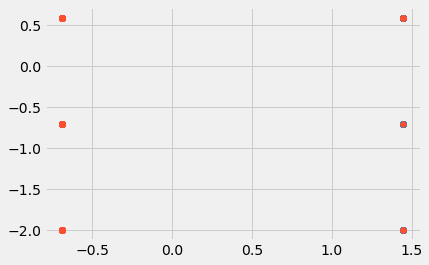

In [159]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(x[row_ix, 0], x[row_ix, 1])

In [160]:
km.cluster_centers_[0]

array([ 1.43292407,  0.11529873, -0.27641856,  0.75169392,  0.94422034,
       -0.27827435,  0.97905944,  0.20336194])

In [161]:
def km_sse(X, N_cluster):
    sse = list()
    for K in range(1, N_cluster+1):
        kmeans = KMeans(n_clusters=K, **km_params)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1,N_cluster+1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('sum of the squared error')

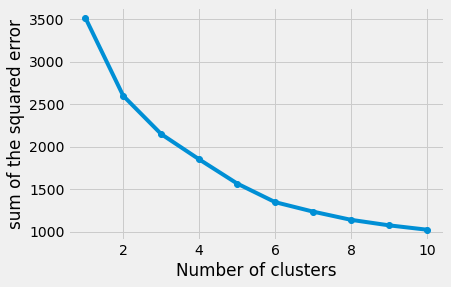

In [162]:
km_sse(x,10)

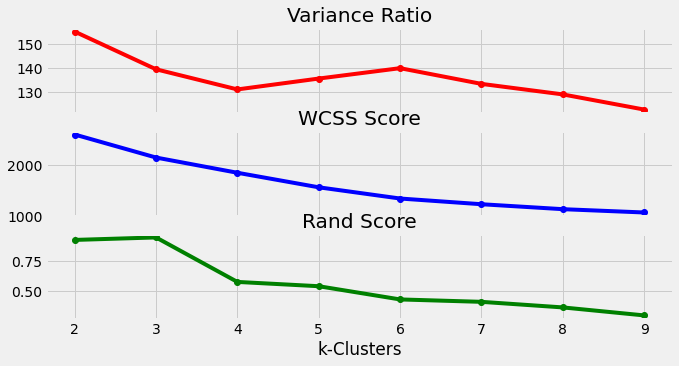

In [163]:
k_vals = range(2,10)

variance_ration = list()
wcss_score = list()
rand_score = list()

for k in k_vals:
    km = KMeans(n_clusters=k, **km_params)
    km.fit(x)
    
    variance_ration.append(calinski_harabasz_score(x, km.labels_))
    wcss_score.append(km.inertia_)
    rand_score.append(adjusted_rand_score(channel, km.labels_))

plt.style.use("fivethirtyeight")
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,5), nrows=3, sharex=True)
ax1.plot(k_vals, variance_ration, 'o-', c='r')
ax2.plot(k_vals, wcss_score, 'o-', c='b')
ax3.plot(k_vals, rand_score, 'o-', c='g')
ax1.set(title='Variance Ratio')
ax2.set(title='WCSS Score')
ax3.set(title='Rand Score', xlabel='k-Clusters')
plt.show()

## Agglomerative Clustering

In [98]:

# Trying out the different linkages.
linkage_dct = {
    'ward': dict(), 
    'complete': dict(), 
    'average': dict(), 
    'single': dict()
}


for linkage in linkage_dct:
    hac = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hac.fit(x)
    linkage_dct[linkage] = {
        'variance_ratio': calinski_harabasz_score(x, hac.labels_),
        'rand_score': adjusted_rand_score(channel, hac.labels_)
    }
    
hac_df = pd.DataFrame(linkage_dct).T.reset_index()
hac_df.columns = ['linkage', 'variance_ratio', 'rand_score']
hac_df['linkage'] = hac_df['linkage'].apply(lambda x: x.title())
hac_df

,linkage,variance_ratio,rand_score
0,Ward,105.441815,0.022565
1,Complete,67.512280,-0.002376
2,Average,67.512280,-0.002376
3,Single,67.512280,-0.002376


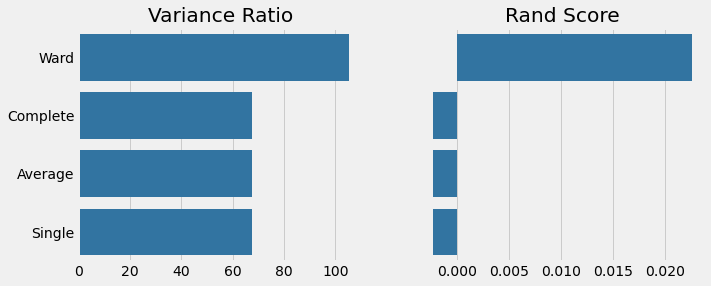

In [99]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.barplot(
    x='variance_ratio', y='linkage', data=hac_df, ax=ax1, color='tab:blue')
ax1.set(title='Variance Ratio')
sns.barplot(
    x='rand_score', y='linkage', data=hac_df, ax=ax2, color='tab:blue')
ax2.set(title='Rand Score')

for ax in (ax1, ax2):
    ax.set(ylabel='', xlabel='')

𓂀